## BRAIN MRI PROJECT

Big Data Project by Mikel Prieto Echegaray & Álvaro Resano Redín

The main objective of this notebook is to perform a CNN model in order to be able to differenciate between several brain tumours.

We have obtained the dataset from Kaggle, url: https://www.kaggle.com/datasets/mohammadhossein77/brain-tumors-dataset

There are 3 types of tumours: glioma, meningioma and pituitary.

Each step of this study will be explained on the notebook.

# 1. Load data

First, we load the data from the url and we set the image size, all the images of the dataset should have this size but we will resize them just in case there is any image with different size.

In [1]:
%run load_data.py

/Users/alfredoresanolizaldre/Desktop/dl/dlvenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/alfredoresanolizaldre/Desktop/dl/dlvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We want to differenciate between the images taken from an axial perspective and the rest of images

Now we transform the data to a PyTorch Dataset

view_tipe="all" --> all images from the dataset

view_tipe="axial" --> images with axial perspective

view_tipe="sagittal" --> rest of the images from the dataset

Not only have we transformed the images to PyTorch, but also:
- resized all images to 224x224
- normalized values to 255
- changed format from (height, width, channel) to (channel, height, width)

We load the dataset

**Count of images per class**

In [6]:
%run plots.py

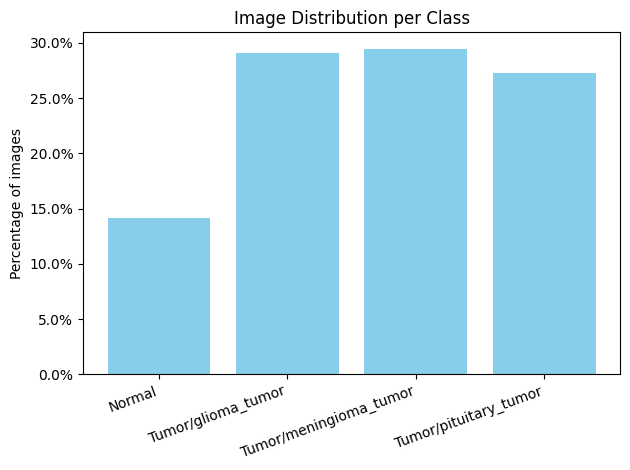

In [7]:
count_of_classes(brain_dataset)

**Random Samples Plot**

Samples from all the dataset

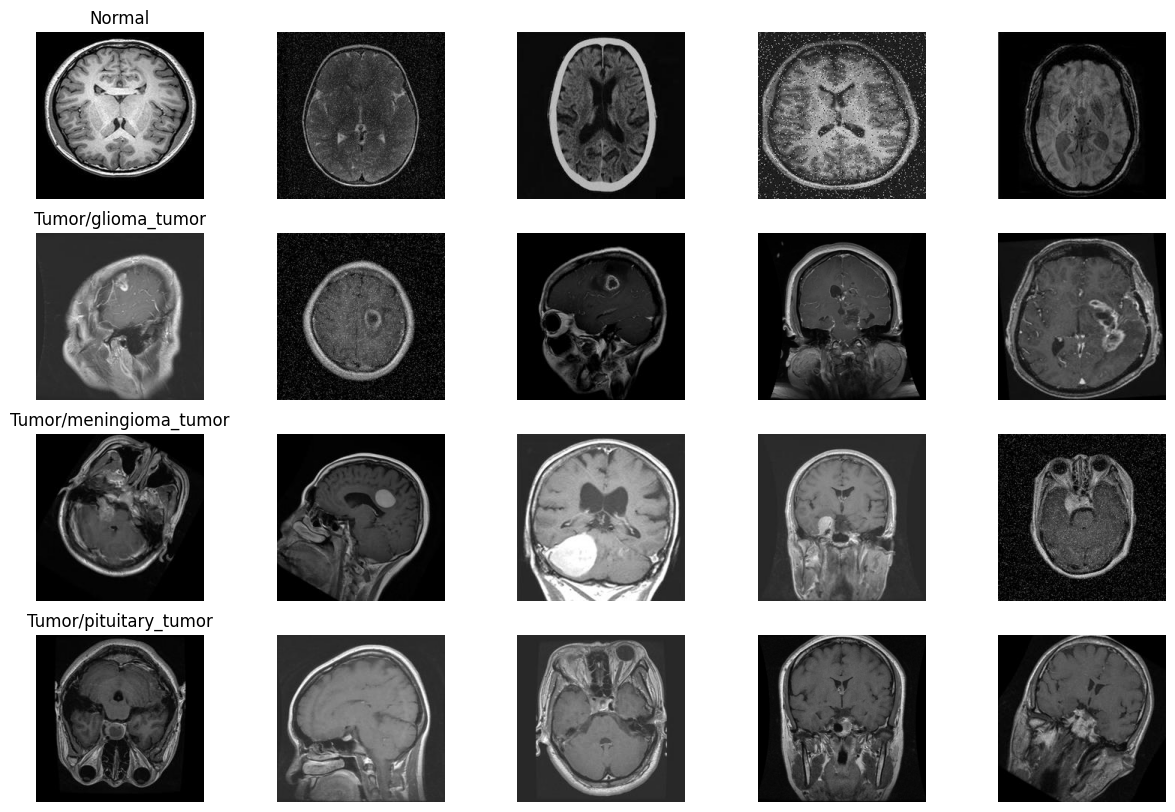

In [8]:
show_random_samples(brain_dataset, brain_dataset.classes)

Random samples from axial perspective

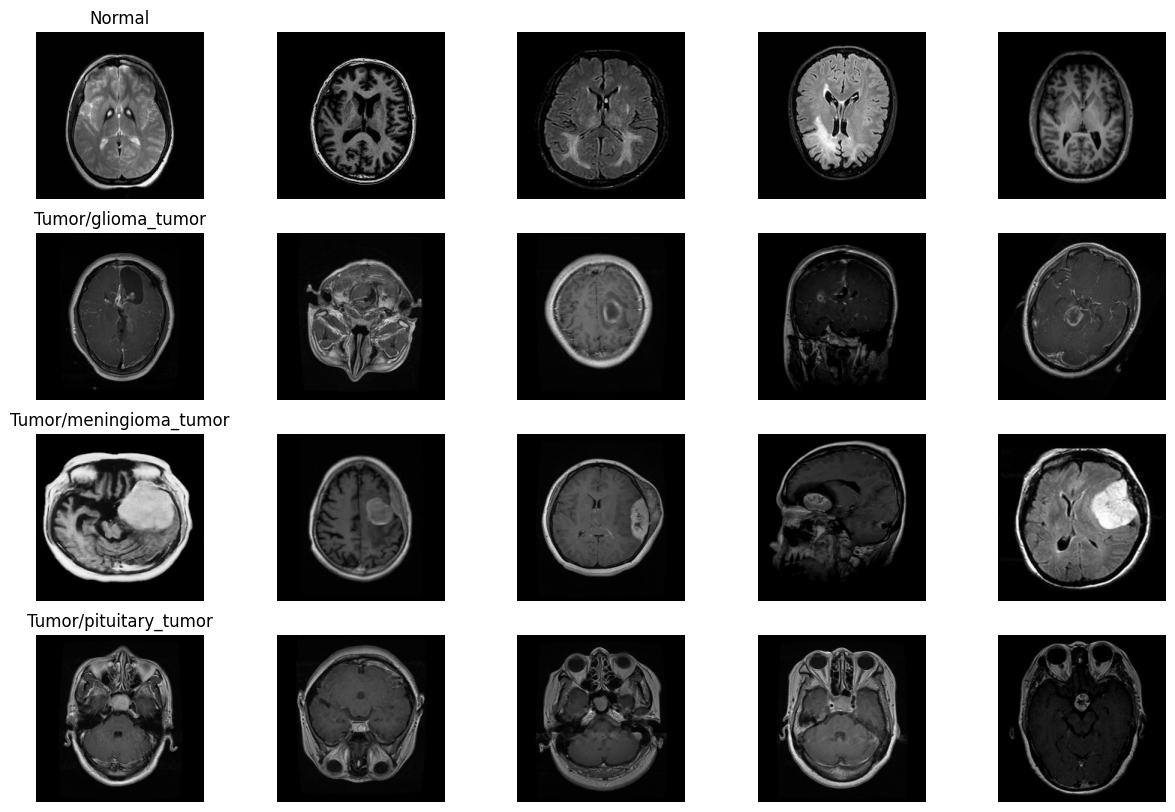

In [9]:
show_random_samples(axial_dataset, axial_dataset.classes)

# 2. Split data in train and test

First, we will set a seed for random functions

In [10]:
%run train_test_split.py

We split data in 80% train and 20% test.
We have stratified the data in order to guarantee the proportion between classes remains 

We will use cuda if it is available instead of the cpu

In [11]:
import torch
def get_device():
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")

device = get_device()


# 3. CNN Arquitecture

The next step is to create the Convolutional Neural Network, with 3 convolutional layers, max pooling and 2 fully connected layers. We have also decided to use Dropout for regularization.

In [12]:
%run cnn.py

# 4. Model Training

Now we need to train our model in order to learn from our images and hwo the different tumours are shown on RMIs.

This is the train function we will be performing

In [13]:
%run training.py

First, we create an instance of our model and change it to GPU or CPU.

We use CrossEntropyLoss for multiclass classification.

We use Adam as optimizer with learning rate equal to 0.001.

Finally, we train the model 10 epochs and we save the Loss.

In [15]:
import torch.optim as optim

model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

history = train_model(model, train_loader, criterion, optimizer, num_epochs=10)

Epoch 1/10, Loss: 0.8649
Epoch 2/10, Loss: 0.4673
Epoch 3/10, Loss: 0.2607
Epoch 4/10, Loss: 0.1632
Epoch 5/10, Loss: 0.1029
Epoch 6/10, Loss: 0.0806
Epoch 7/10, Loss: 0.0627
Epoch 8/10, Loss: 0.0568
Epoch 9/10, Loss: 0.0503
Epoch 10/10, Loss: 0.0462


**Training Loss Plot**

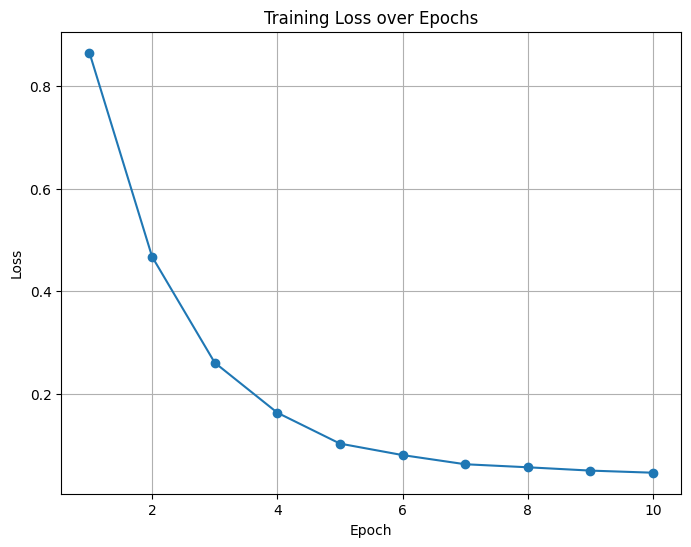

In [17]:
plot_training_loss(history)

The conclusion we obtain based on the Elbow Rule is that it is not necessary to perform 10 epochs for our training, 5 are enough.

**Final Model**

In [18]:
final_model = CNNModel().to(device)
optimizer = optim.Adam(final_model.parameters(), lr=0.001)

train_model(final_model, train_loader, criterion, optimizer, num_epochs=5)

Epoch 1/5, Loss: 0.9225
Epoch 2/5, Loss: 0.5058
Epoch 3/5, Loss: 0.2911
Epoch 4/5, Loss: 0.1717
Epoch 5/5, Loss: 0.1107


{'loss': [0.9224663997048381,
  0.5057723854850579,
  0.29108652737802687,
  0.17170640485828598,
  0.11073657035710792]}

**Confusion Matrix Plot**

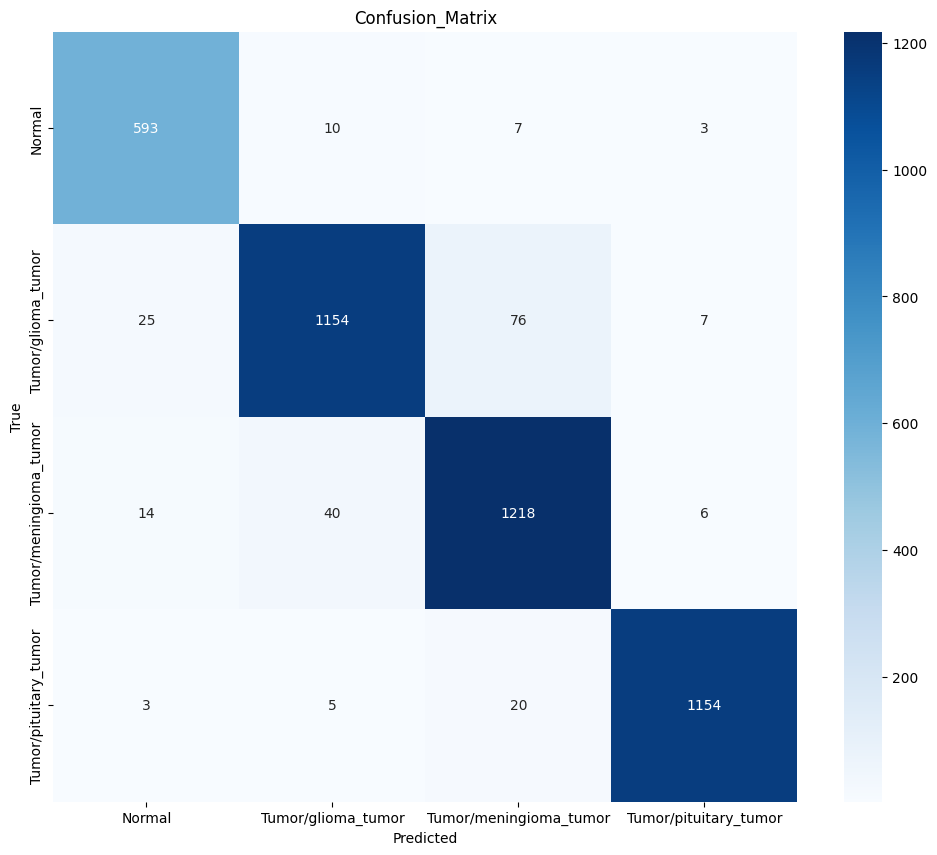

In [19]:
plot_confusion_matrix(final_model, test_loader, brain_dataset.classes)

# 5. Model Evaluation

On this last part of our notebook, we evaluate how our model has performed using standard classification metrics.

In [20]:
%run evaluation.py

In [21]:
evaluate_model(final_model, test_loader)

Accuracy: 95.02%
Precision: 0.9507
Recall: 0.9502
F1 Score: 0.9502


**ROC Curves plot**

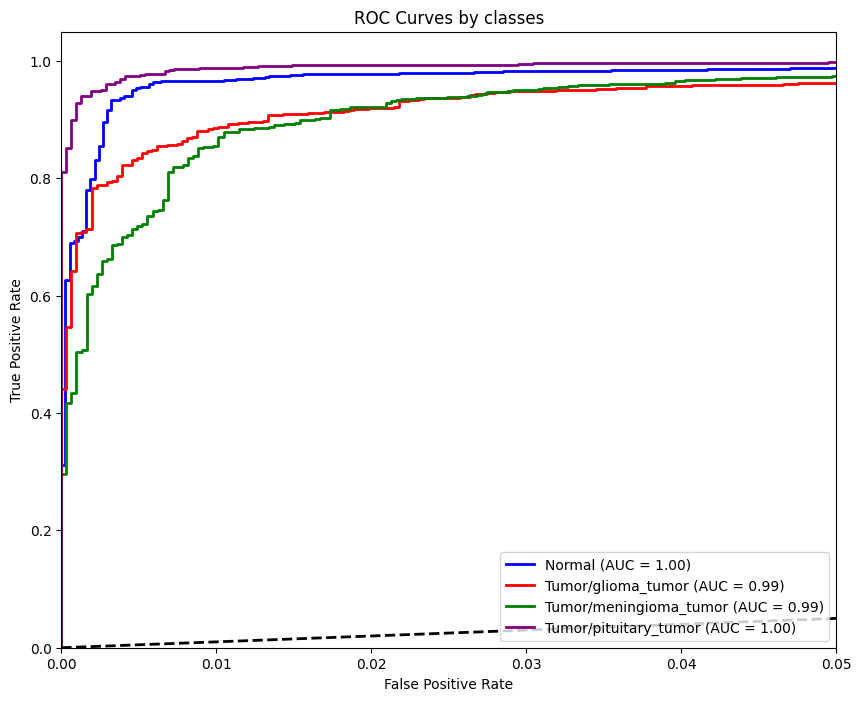

In [22]:
plot_roc_curves(final_model, test_loader, brain_dataset.classes)

# PCA AND MEAN IMAGES FROM AXIAL IMAGES

First we load inly the images from the axial perspective

**MEAN IMAGE PER CLASS**

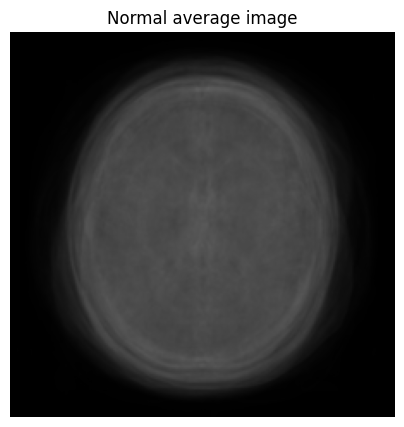

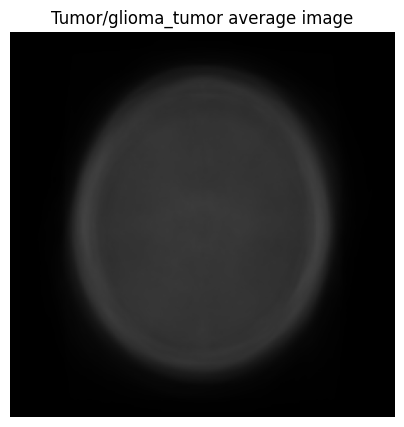

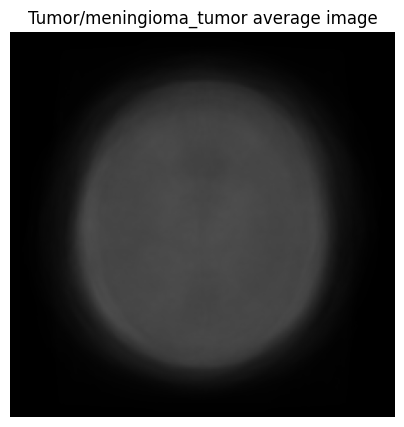

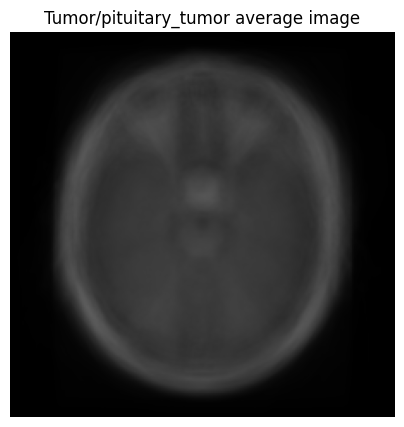

In [72]:
%run mean.py

**DIFFERENCE BETWEEN HEALTHY BRAIN AND EACH TUMOR**

/Users/alfredoresanolizaldre/Desktop/dl/BigData/mean.py:40: RuntimeWarning: invalid value encountered in sqrt
  glioma_mean = mean_images_by_class["Tumor/glioma_tumor"]


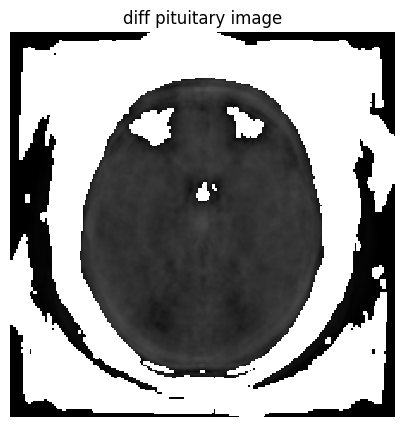

In [68]:
mean_diff(normal_mean, pituitary_mean, "pituitary")

That white circle in the centre is where the pituitary gland is located. There is where the pituitary tumor is. 

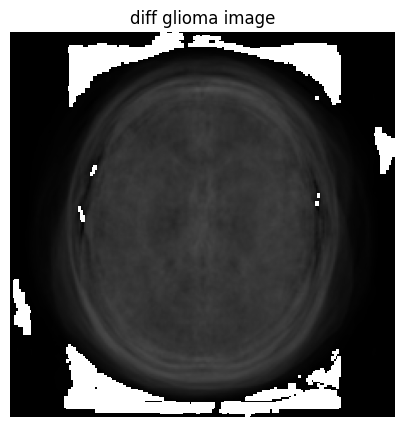

In [69]:
mean_diff(normal_mean, glioma_mean, "glioma")

Unfortunately, we can not see well where the glioma tumor is usually located.

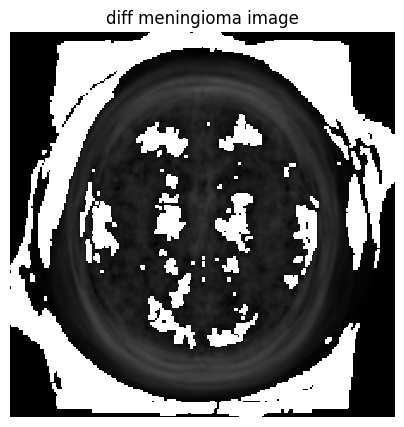

In [70]:
mean_diff(normal_mean, meningioma_mean, "meningioma")

For the meningioma tumor, we see it can be developed in a lot of locations of the brain.

**PCA**

**Visualize first 3 components as images**

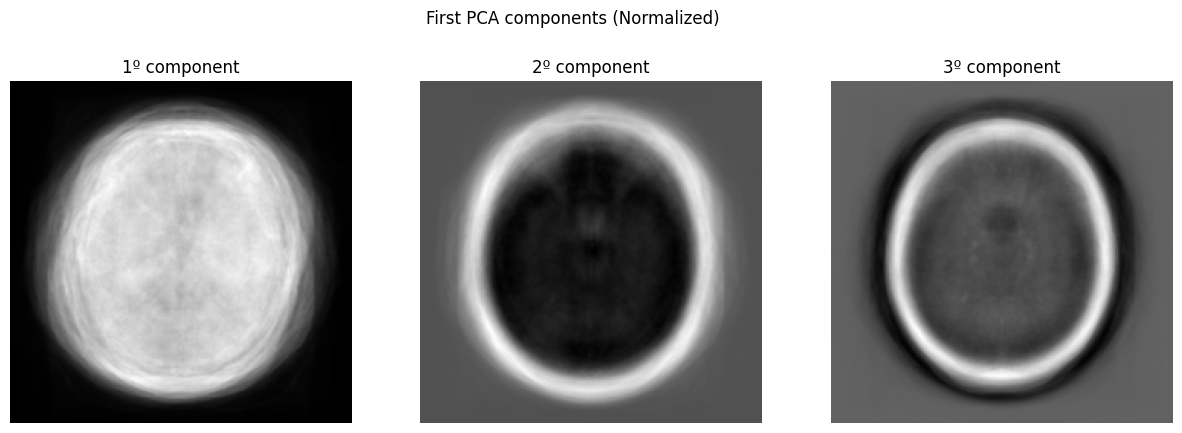

In [73]:
pca, X_pca, images = pca_analysis(n_components=50)
normalized_components(pca, images)

These are the first 3 components for all brains, so it basically explains how the brain is from an axial view.

In [78]:
%run pca.py

As we want to see where the tumors usually are founded, we will see the first 3 components per tumor.

  449 images


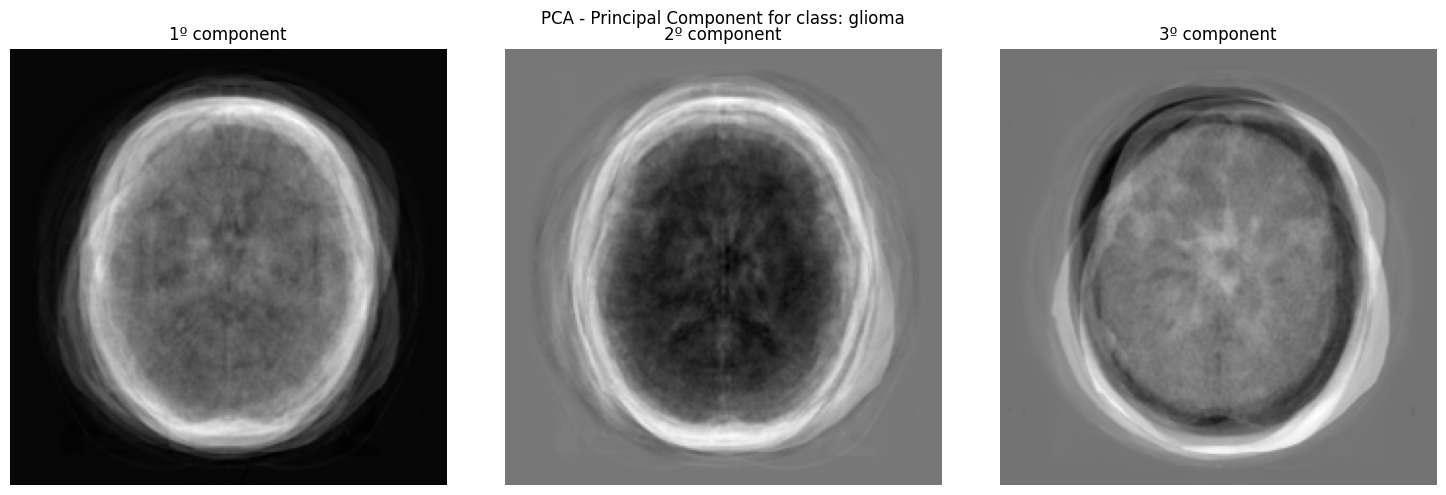

  1606 images


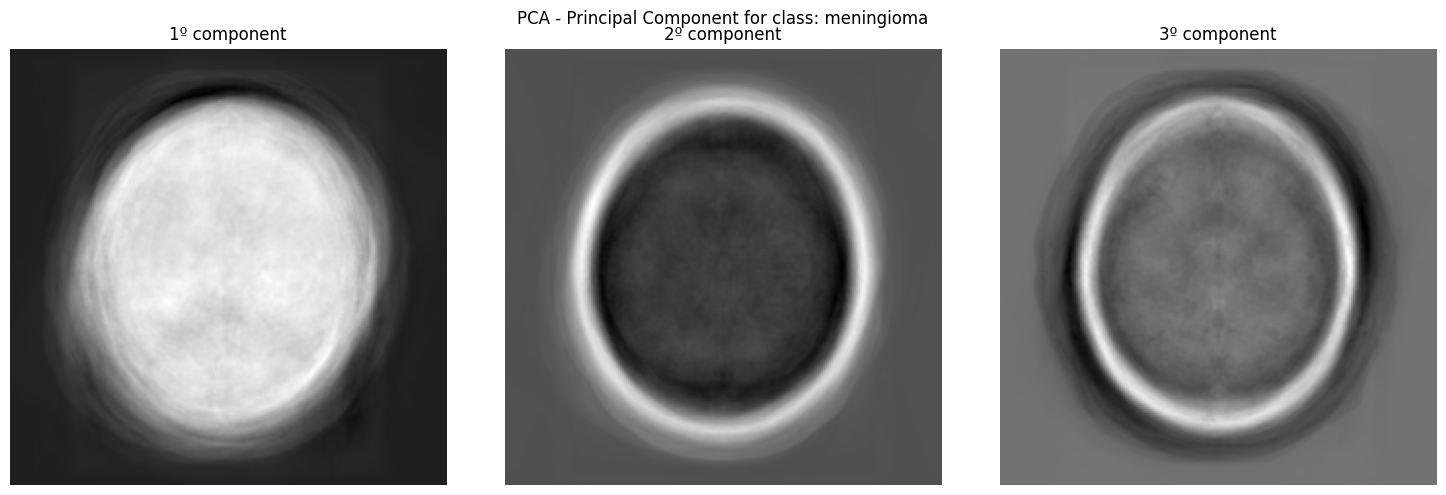

  1183 images


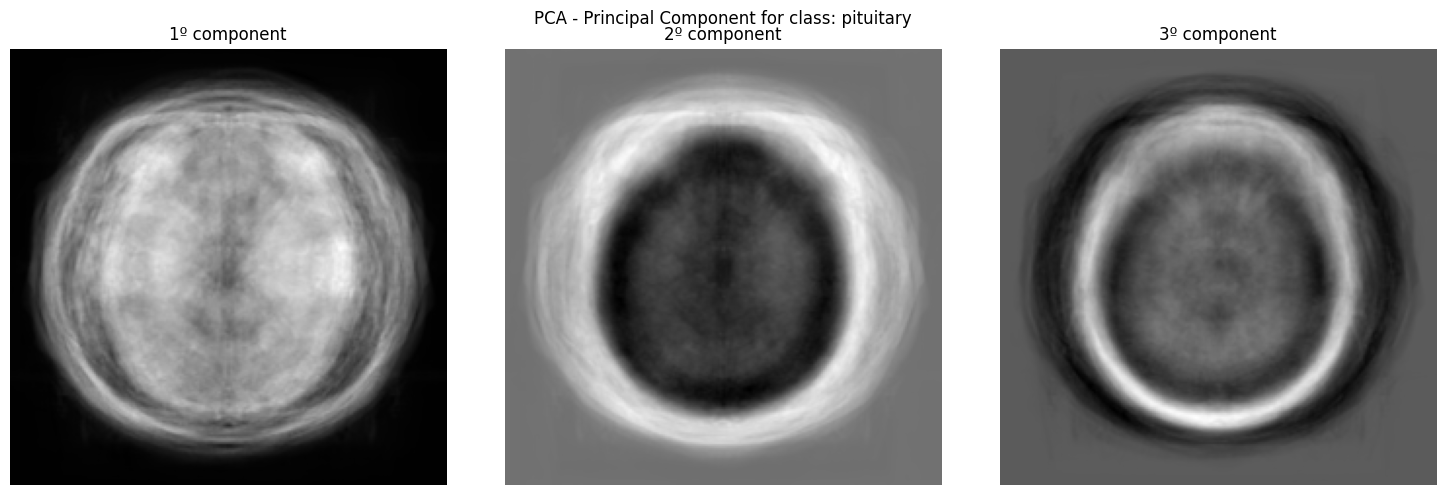

  658 images


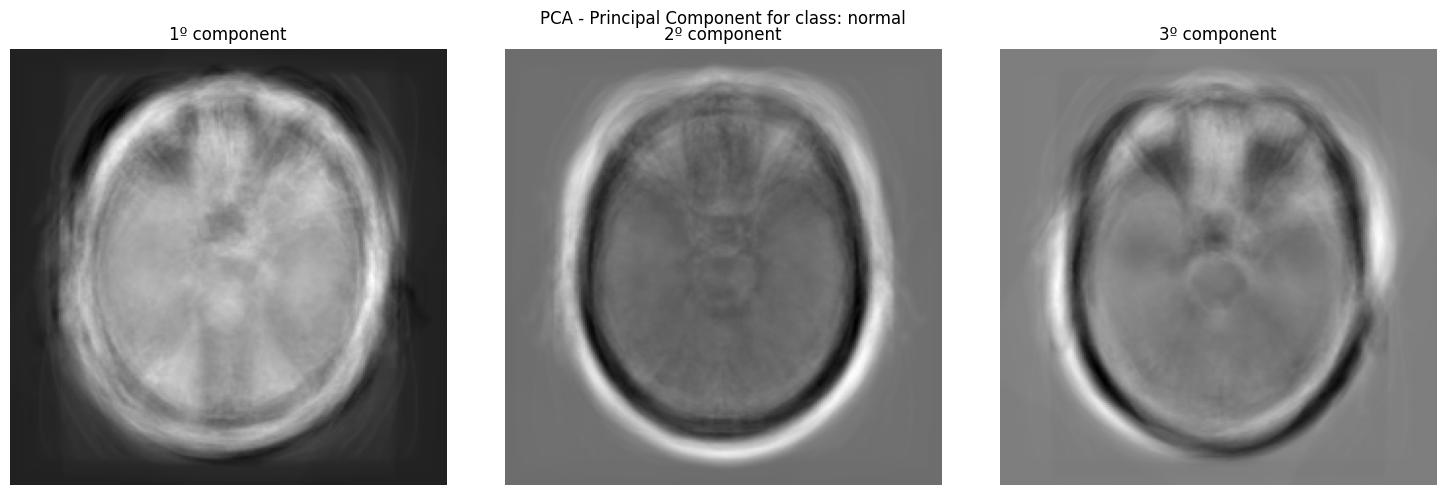

In [75]:
pca_by_classes()

# PCA AND T-SNE

Why didn't we use PCA or T-SNE to classify the images? These methods are faster and their computational cost is way lower. Let's see how these methods classify.

**PCA OF ALL IMAGES AND THEIR CLASSIFICATION**

Data matrix shape: (3896, 150528)


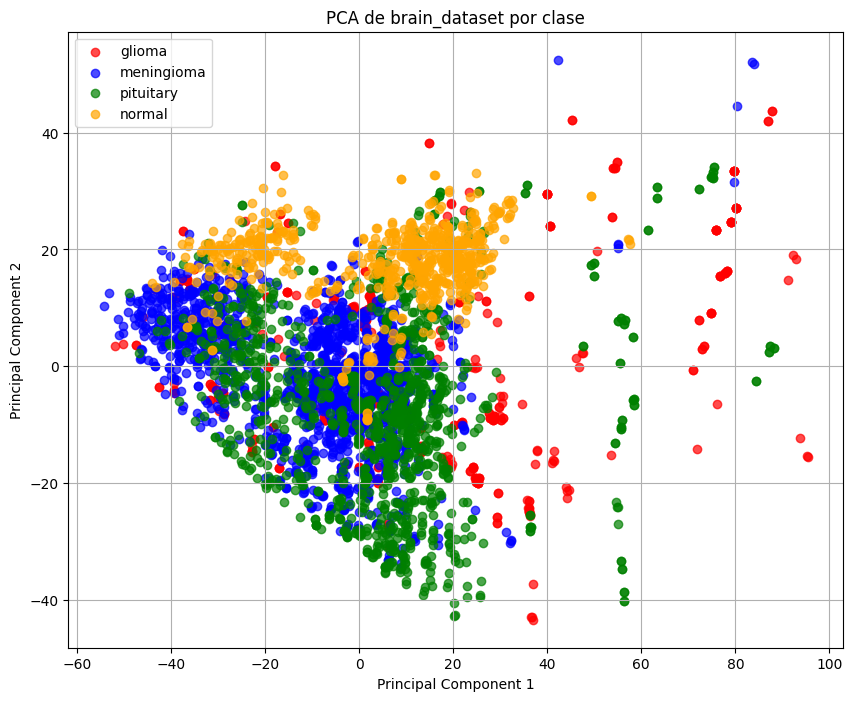

In [79]:
full_pca()

**T-SNE CLASSIFICATION**

Data matrix shape: (3896, 150528)


/Users/alfredoresanolizaldre/Desktop/dl/dlvenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


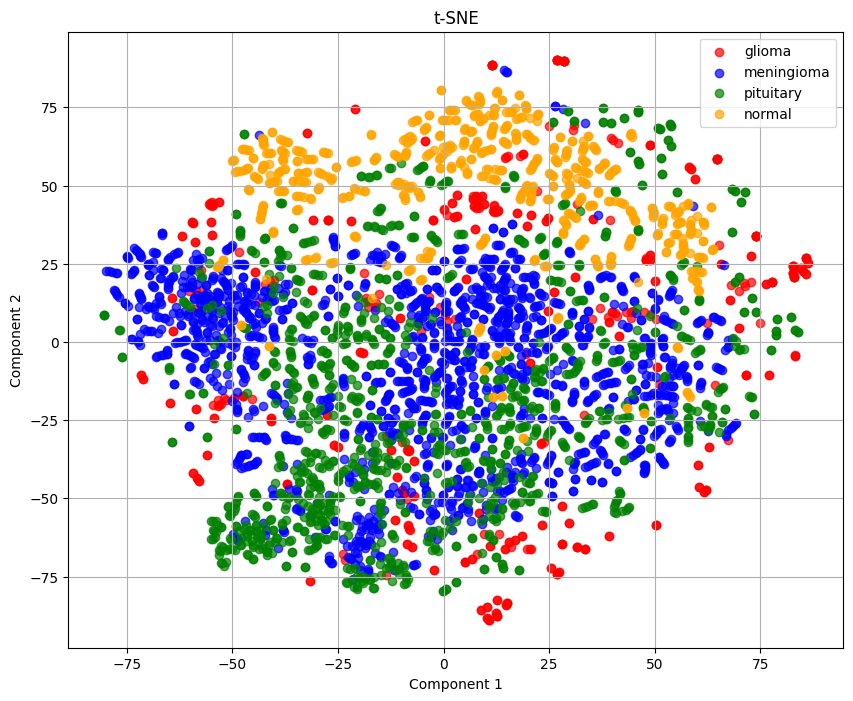

In [77]:
%run t-sne.py

As we can see, these learning methods don't work for our project. We can not conclude anything from these plots.

That was why we needed a CNN. The computational cost may have been higher, but the results are better.